<a href="https://colab.research.google.com/github/honggi82/Software_application_lecture/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [1]:
!pip install tensorflow
!pip install opencv-python

# 구글 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 라이브러리 가져오기

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Training 데이터셋 불러오기
"http://content/gdrive/MyDrive/software/"는 데이터셋이 있는 폴더 위치로 다른 경우 변경해야 함.
각 사진 파일은 "face숫자_숫자.jpg"란 이름으로 저장되어 있으며, 앞의 숫자는 class를 뒤의 숫자는 몇 번째 데이터인지를 나타내는 숫자임.
아래 코드는 class가 0, 1, 2가 있으며, 데이터가 100개 있는 경우에 대한 코드임.

In [4]:
train_X=[]; test_X=[]; train_Y=[]; test_Y=[];

for i in range(0,100): # 데이터셋 100개를 training 용으로 읽어오는 코드
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224,224))) # 사진 크기를 50*50으로 변경해주는 코드
    train_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224,224)))
    train_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224,224)))
    train_Y.append(2)

# 데이터를 numpy array로 변경

In [5]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

# 샘플 테이터 그려보기

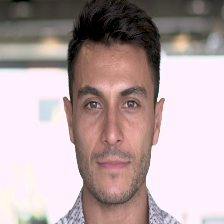

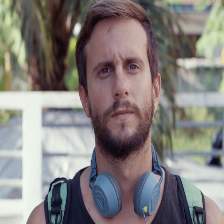

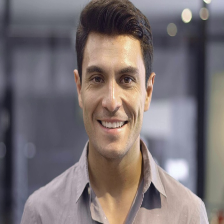

0
1
2


In [6]:
cv2_imshow(train_X[0]); cv2_imshow(train_X[1]); cv2_imshow(train_X[2]);
print(train_Y[0]); print(train_Y[1]); print(train_Y[2]);

# Test 데이터셋 불러오기

In [7]:
for i in range(100,200):
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224,224)))
    test_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224,224)))
    test_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224,224)))
    test_Y.append(2)

# 데이터를 numpy array로 변경

In [8]:
test_X=np.array(test_X)
test_Y=np.array(test_Y)

# 샘플 테이터 그려보기

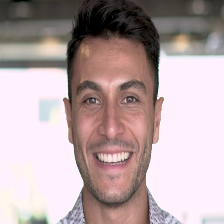

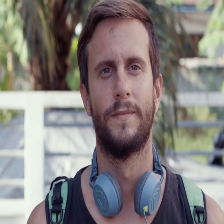

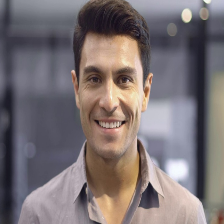

0
1
2


In [9]:
cv2_imshow(test_X[0]); cv2_imshow(test_X[1]); cv2_imshow(test_X[2]);
print(test_Y[0]); print(test_Y[1]); print(test_Y[2]);

# 데이터 정규화

In [10]:
train_X = train_X.astype('float32')/255.0
test_X = test_X.astype('float32')/255.0

# One-Hot Encoding

In [11]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

# Pretrained model인 MobileNetV2를 가져옴

In [12]:
pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 새 layers 추가

In [13]:
model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(3, activation='softmax')
])

# Compile

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │       188,163 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,446,147 (9.33 MB)

 Trainable params: 188,163 (735.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Training

In [15]:
history=model.fit(train_X, train_Y, batch_size=8, epochs=5)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.8869 - loss: 0.5024
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00


# Fine tuning

In [16]:
pretrained_model.trainable = True
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])
history=model.fit(train_X, train_Y, batch_size=8, epochs=5)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8430 - loss: 2.0434
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 4.7100e-04
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 1.0000 - loss: 4.3428e-06
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 1.0000 - loss: 1.6391e-05
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 3.6784e-06


# Test

In [17]:
_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: ', accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Accuracy:  1.0


# Loss 그리기

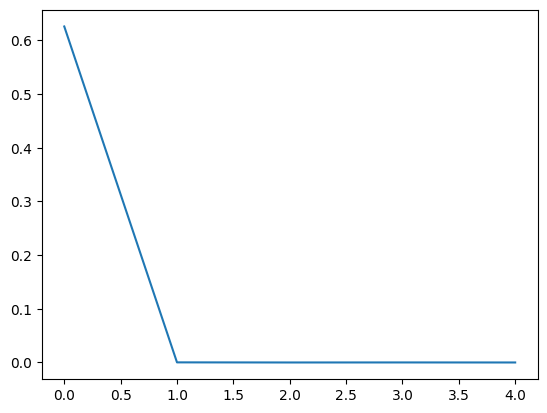

In [18]:
plt.plot(history.history['loss'], label='loss')

# n번째 데이터 예측 후 실제 값과 비교

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


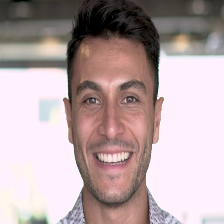

Prediction: [0.99999994 0.         0.        ]
Real: [1. 0. 0.]


In [19]:
trial=0
pred=model.predict(test_X)
cv2_imshow(test_X[trial]*255);
print("Prediction: " + str(pred[trial]))
print("Real: " + str(test_Y[trial]))